# wordCloud


## dependencies

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [60]:
!pip install python-bidi
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
!pip install bangla

!pip install langdetect #to detect language

## font test method

In [61]:
# get english and bangla
# you can detact any language here
from langdetect import detect
def what_language(the_text):
    return detect(the_text)

In [62]:
textbangla = 'আমার নাম আবির।'
textEnglish = 'my name is abir.'
otherText = 'mon nom est abir' # French
texthindi = 'बादामी होता है।'

In [63]:
print(what_language(textbangla))
print(what_language(textEnglish))
print(what_language(otherText)) 
print(what_language(texthindi)) 

bn
en
fr
hi


## WordCloud methods

In [64]:
## Prepare text from list.
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [72]:
# provide same text with same font data otherwise it show box only
def wordcloud(text_data, path):
    text = listToString(text_data)
    bidi_text = get_display(text)
    # set you own height & width
    try:
        if detect(text) == 'en': # english don't required any font
            wordcloud = WordCloud(width = 3000, height = 2000, colormap='Set2').generate(bidi_text)
        elif detect(text) == 'hi':
            wordcloud = WordCloud(font_path=path, width = 3000, height = 2000, colormap='Set2').generate(bidi_text)
        elif detect(text) == 'bn':
            rgx = r"[\u0980-\u09FF]+" # remove radix
            wordcloud = WordCloud(font_path=path, regexp=rgx, width = 3000, height = 2000, colormap='Set2').generate(bidi_text)
        plt.rcParams['figure.figsize'] = (20,20)
        # plt.rcParams["figure.dpi"] = 10 #can set plot dpi if needed
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    except:
        print("Error happen")

## load data

In [66]:
input_path = '/content/dummy_dataset.csv' # your data set
new_df = pd.read_csv(input_path)
new_df.head()

,article_writing
0,"সুকরান জাযিলান,,জাযাকাল্লাহ খায়ের,,"
1,দেখবেন যারা আসলে পাওয়ার যোগ্য তারা পাবেন।
2,পেন ড্রাইভ মিস করলেউ টি-শার্ট এর অরডার দিয়ে ফে...
3,"আল্লাহ এক ও অদিতীও,তার কোন শরীক নাই।"
4,"অবসর সময়ে টিউটোরিয়াল, গেমপ্লে, ট্রেইলার দেখেই ..."


In [ ]:
the_text_list = new_df['article_writing'][:].tolist()
# print(the_text_list)

### split data into proper language 

In [68]:
bangla_article = []
english_article = []
hindi_article = []
l =  len(new_df)
for i in range(0, l):
    the_text = str(the_text_list[i]).translate({ord(i): None for i in '{}'})
    if the_text is not np.nan and len(the_text)>0:
        if detect(the_text) == 'en':
            english_article.append(the_text)
        elif  detect(the_text) == 'bn':
            bangla_article.append(the_text)
        elif  detect(the_text) == 'hi':
            hindi_article.append(the_text)

print(len(bangla_article))
print(len(english_article))
print(len(hindi_article))

232
321
55


## Bangla WC

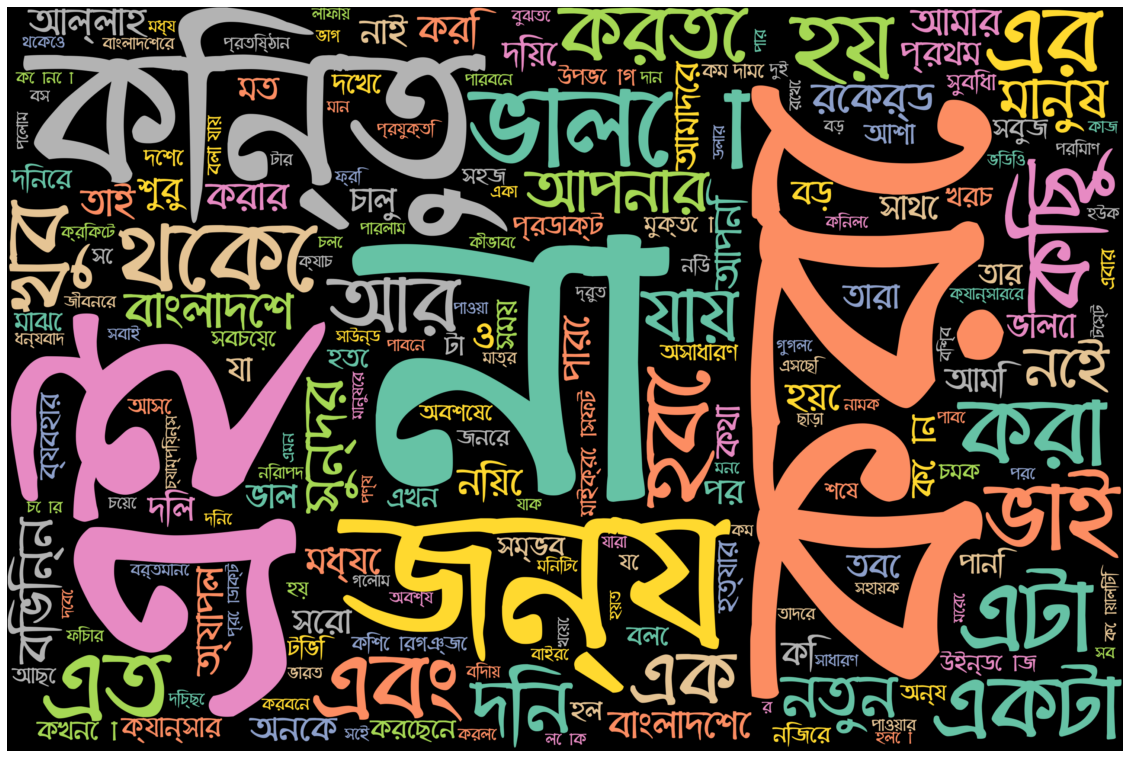

In [69]:
# you can get bangla front from here
# https://www.omicronlab.com/bangla-fonts.html 

# bangla font path
font_path = '/content/BenSenHandwriting.ttf'
wordcloud(bangla_article, font_path)

## English WC

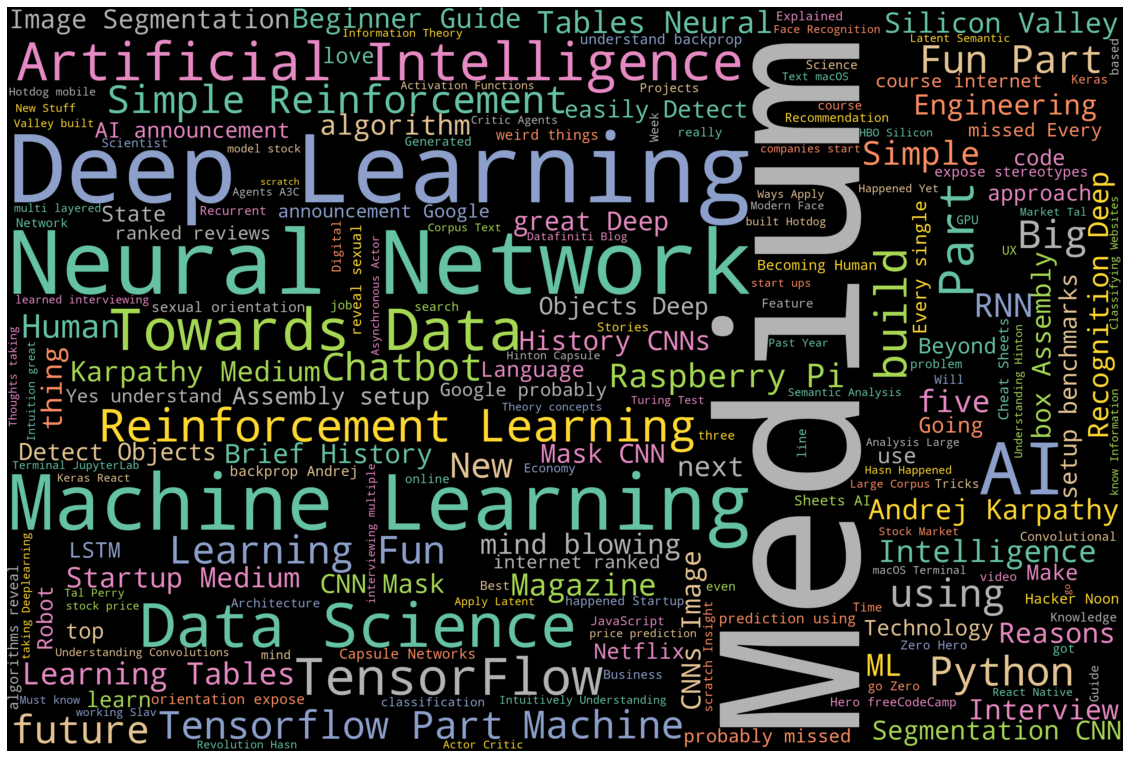

In [70]:
wordcloud(english_article, 'nothing')

## Hindi WC

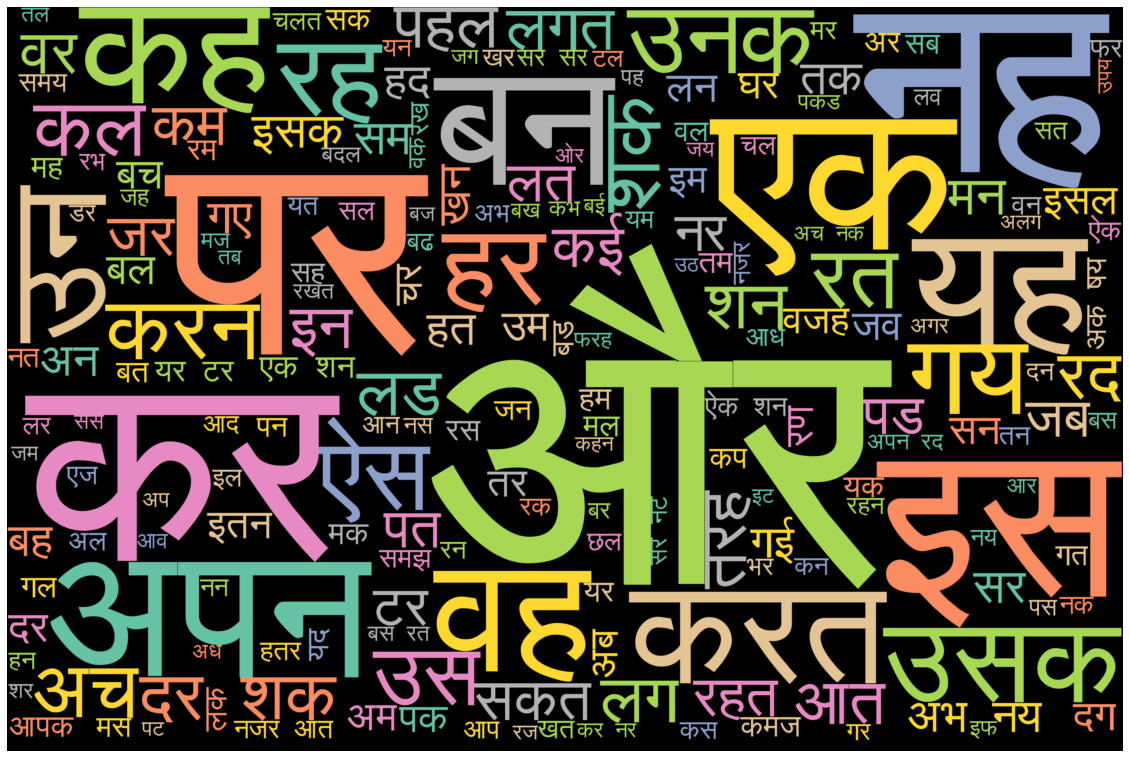

In [73]:
# hindi font path
font_path = '/content/gargi.ttf'
wordcloud(hindi_article, font_path)